In [2]:
import cv2

import matplotlib.pyplot as plt
import os
import pickle



In [3]:


def display_img(image_path, size = 13):
    # Specify the path to the image file
    #image_path = image_path #'/usr/users/vogg/fcsgg/lemurs/data/data/frames/train/6/c6/frame456.jpg'
    root = "../../fcsgg/"
    # Load the image using OpenCV
    image = cv2.imread(os.path.join(root, image_path))

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Increase the size of the image output
    plt.figure(figsize=(size, size))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

category_colors = {
    0: (0, 255, 0),   # Green for category 0
    1: (0, 0, 255),   # Red for category 1
    # You can add more categories/colors here
}

In [3]:

# Specify the path to the .pkl file
pkl_file_path = '/usr/users/vogg/fcsgg/lemurs/data/data/pkls/lemur_train.pkl'


class IgnoreUnpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if "detectron2" in module:  # Check if "detectron2" is a substring of module
            print(f"Warning: Skipping loading module {module}. Returning a placeholder.")
            return lambda *args, **kwargs: None  # Return a placeholder (e.g., a lambda function)
        return super().find_class(module, name)

# Load the pickle file with the custom Unpickler
with open(pkl_file_path, 'rb') as file:
    unpickler = IgnoreUnpickler(file)
    data = unpickler.load()



In [100]:
len(data)

49532

file_name lemurs/data/data/frames/train/9/c6/frame15047.jpg
image_id 15055
height 1080
width 1920
relations [[2, 1, 0], [2, 3, 0]]
annotations [{'bbox': [1527.9587873624785, -14.340878738640065, 98.86911981180964, 106.93689677050028], 'bbox_mode': None, 'category_id': 0, 'indiv_id': 38}, {'bbox': [740.3330196225413, 215.58993682266524, 94.23112025420996, 126.23835643414832], 'bbox_mode': None, 'category_id': 0, 'indiv_id': 35}, {'bbox': [884.1163653941079, 281.4435792234593, 127.5459011831606, 126.13089821175282], 'bbox_mode': None, 'category_id': 0, 'indiv_id': 40}, {'bbox': [711.3236480815094, 63.86363527398102, 96.34351793871168, 115.24068661991404], 'bbox_mode': None, 'category_id': 0, 'indiv_id': 29}, {'bbox': [757.032133635125, 540.7019249467758, 208.50508655983984, 190.68575447746355], 'bbox_mode': None, 'category_id': 1, 'indiv_id': 1}, {'bbox': [779.085655427914, 68.87366833895297, 90.23793272918716, 87.80358755778114], 'bbox_mode': None, 'category_id': 1, 'indiv_id': 7}, {'bb

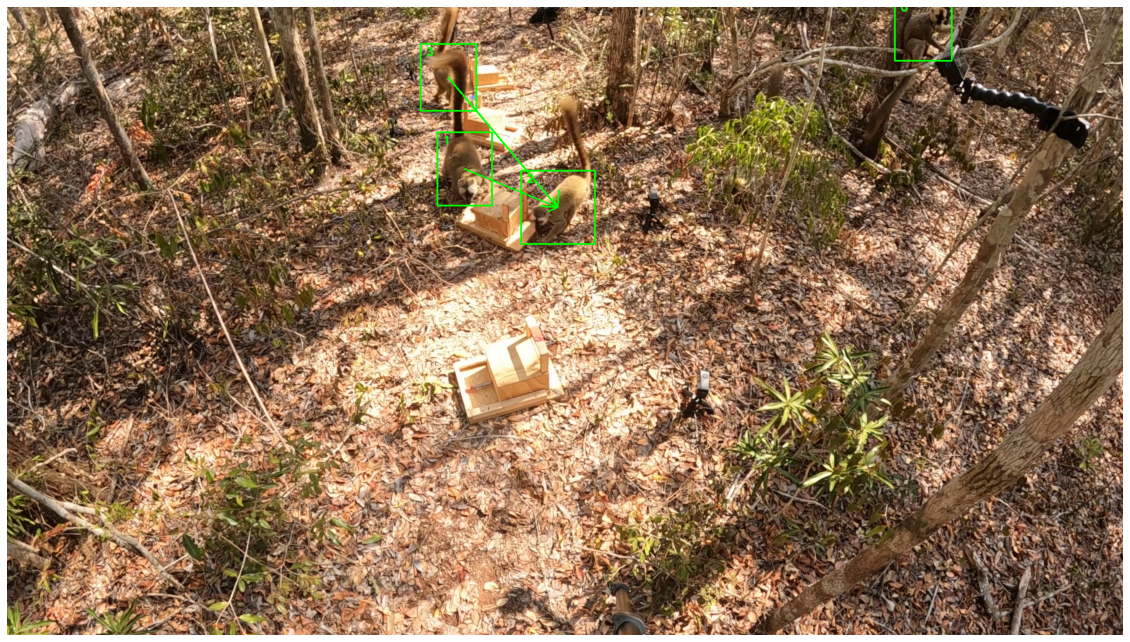

In [108]:
i = 5490

labels = data[i]

for key in labels.keys():
    print(key, labels[key])

relations = labels['relations']
detections = labels['annotations']
image_path = labels['file_name']

#display_img(labels['file_name'], size = 5)

root = "../../fcsgg/"
# Load the image using OpenCV
image = cv2.imread(os.path.join(root, image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Loop through each detection in the list
for j, detection in enumerate(detections):
    bbox = detection['bbox']  # Get bounding box
    
    category_id = detection['category_id']  # Get category ID
    # Extract bounding box coordinates (x, y, width, height)
    x, y, width, height = bbox
    x, y = int(x), int(y)  # Convert to integers for OpenCV functions
    width, height = int(width), int(height)

    # Determine the color based on the category ID
    color = category_colors.get(category_id, (255, 255, 255))  # Default to white if no category found

    # Draw the bounding box using cv2.rectangle
    if category_id == 0:
        image = cv2.rectangle(image, (x, y), (x + width, y + height), color, thickness=2)

        # Optionally, add the category_id as text on top of the box
        image = cv2.putText(image, f'{j}', (x+ 10, y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Loop through each relation in the list
for relation in relations:
    # Get the indices of the detections involved in the relation
    idx2, idx1, _ = relation

    # Get the bounding box coordinates of the detections
    x1, y1, width1, height1 = detections[idx1]['bbox']
    x2, y2, width2, height2 = detections[idx2]['bbox']

    # Calculate the midpoint of the bounding boxes
    mid_x1 = int(x1 + width1 / 2)
    mid_y1 = int(y1 + height1 / 2)
    mid_x2 = int(x2 + width2 / 2)
    mid_y2 = int(y2 + height2 / 2)

    color = category_colors.get(0, (255, 255, 255))
    # Draw an arrow from the midpoint of detections[idx1] to the midpoint of detections[idx2]
    image = cv2.arrowedLine(image, (mid_x1, mid_y1), (mid_x2, mid_y2), color, thickness=2)


plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [101]:
import os

# Specify the start and end points for iteration
start = 801
end = 1600

# Create a folder to save the images
output_folder = '../videos/interactions'
os.makedirs(output_folder, exist_ok=True)

# Iterate over i
for i in range(start, end):
        
    labels = data[i]

    #for key in labels.keys():
    #    print(key, labels[key])

    relations = labels['relations']
    detections = labels['annotations']
    image_path = labels['file_name']

    #display_img(labels['file_name'], size = 5)

    root = "../../fcsgg/"
    # Load the image using OpenCV
    image = cv2.imread(os.path.join(root, image_path))
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Loop through each detection in the list
    for j, detection in enumerate(detections):
        bbox = detection['bbox']  # Get bounding box
        
        category_id = detection['category_id']  # Get category ID
        # Extract bounding box coordinates (x, y, width, height)
        x, y, width, height = bbox
        x, y = int(x), int(y)  # Convert to integers for OpenCV functions
        width, height = int(width), int(height)

        # Determine the color based on the category ID
        color = category_colors.get(category_id, (255, 255, 255))  # Default to white if no category found

        # Draw the bounding box using cv2.rectangle
        image = cv2.rectangle(image, (x, y), (x + width, y + height), color, thickness=2)

        # Optionally, add the category_id as text on top of the box
        image = cv2.putText(image, f'{j}', (x+ 10, y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Loop through each relation in the list
    for relation in relations:
        # Get the indices of the detections involved in the relation
        idx2, idx1, _ = relation

        # Get the bounding box coordinates of the detections
        x1, y1, width1, height1 = detections[idx1]['bbox']
        x2, y2, width2, height2 = detections[idx2]['bbox']

        # Calculate the midpoint of the bounding boxes
        mid_x1 = int(x1 + width1 / 2)
        mid_y1 = int(y1 + height1 / 2)
        mid_x2 = int(x2 + width2 / 2)
        mid_y2 = int(y2 + height2 / 2)

        color = category_colors.get(0, (255, 255, 255))
        # Draw an arrow from the midpoint of detections[idx1] to the midpoint of detections[idx2]
        image = cv2.arrowedLine(image, (mid_x1, mid_y1), (mid_x2, mid_y2), color, thickness=2)
        
    # Save the image
    image_filename = f'image_{i}.jpg'
    image_path = os.path.join(output_folder, image_filename)
    cv2.imwrite(image_path, image)
    cv2.destroyAllWindows()


# 590 - 600 shows a lot of bad examples



In [7]:
%load_ext autoreload
%autoreload 2

import sys
if '../src/lib/' not in sys.path:
    sys.path.append('../src/lib/')

import numpy as np
from torch.utils.data import random_split, Subset
import torch

import torch.nn.functional as F


import datasets.dataset as dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
train_dataset = dataset.InteractionTripletDataset(
    root = "../../fcsgg/",
    file_name = "lemurs/data/data/pkls/new_lemur_train.pkl"
    )

val_dataset = dataset.InteractionTripletDataset(
        root="../../fcsgg/",
        file_name="lemurs/data/data/pkls/new_lemur_test.pkl",
    )

In [9]:
len(train_dataset), len(val_dataset)

(30194, 628)

In [12]:
# Choose an index from val_dataset
val_index = 0

# Get the image from val_dataset
val_dict = val_dataset[val_index]
val_image_orig = val_dict['union']

# Resize the image to 30x30
val_image = F.interpolate(val_image_orig.unsqueeze(0), size=(30, 30), mode='bilinear', align_corners=False).squeeze(0)

# Flatten the image to a vector
val_vector = val_image.flatten()

# Initialize variables to store the closest image and its distance
closest_image = None
closest_distance = float('inf')

# Iterate over train_dataset
for train_index in range(1000):
    if train_index % 100 == 0:
        print(f"Step {train_index}: Distance = {closest_distance}")
    # Get the image from train_dataset
    train_dict = train_dataset[train_index]
    train_image_orig = train_dict['union']

    # Resize the image to 30x30
    train_image = F.interpolate(train_image_orig.unsqueeze(0), size=(30, 30), mode='bilinear', align_corners=False).squeeze(0)

    # Flatten the image to a vector
    train_vector = train_image.flatten()

    # Calculate the Euclidean distance between the two vectors
    distance = torch.dist(val_vector, train_vector)

    # Check if the current image is closer than the previous closest image
    if distance < closest_distance:
        closest_image = train_image_orig
        closest_distance = distance


Step 0: Distance = inf
Step 100: Distance = 3598.9453125
Step 200: Distance = 3346.5185546875
Step 300: Distance = 3346.5185546875
Step 400: Distance = 3235.2138671875
Step 500: Distance = 3180.117431640625
Step 600: Distance = 3180.117431640625
Step 700: Distance = 3180.117431640625
Step 800: Distance = 3137.45458984375
Step 900: Distance = 3137.45458984375


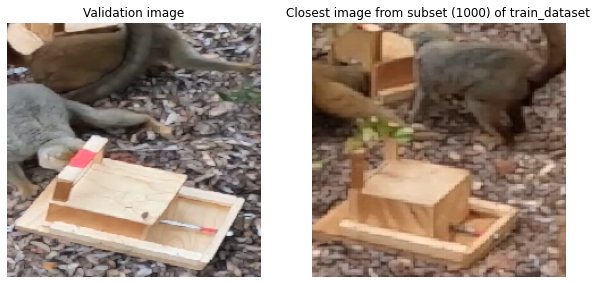

In [13]:

# Display the closest_image
plt.figure(figsize=(10, 5))

# Display the first image in the first subplot
plt.subplot(1, 2, 1)
plt.imshow(val_image_orig.permute(1, 2, 0) / 255)
plt.title('Validation image')
plt.axis('off')  # Hide the axes

# Display the second image in the second subplot
plt.subplot(1, 2, 2)
plt.imshow(closest_image.permute(1, 2, 0) / 255)
plt.title('Closest image from subset (1000) of train_dataset')
plt.axis('off')  # Hide the axes

# Show the plot with the two images
plt.show()